## 🤔 ¿Por qué importa la Calibración?

### Caso 1: Aprobación de Créditos 🏦
- Si el modelo dice `P(Default) = 30%`, el banco espera perder en 30 de cada 100 préstamos similares.
- Si en realidad pierden en 60, **el banco quiebra** por confiar en probabilidades falsas.

### Caso 2: Diagnóstico Médico 🏥
- El modelo dice `P(Cáncer) = 5%`. El doctor decide no hacer biopsia.
- Si la probabilidad real es 40%, **el paciente muere** por un modelo sobreconfiado.

### Caso 3: Profit Curves 💰
- Las **Profit Curves** usan probabilidades para calcular ganancias esperadas.
- Si las probabilidades son mentira, **tus cálculos de ROI son fantasía**.

> **Regla de Oro:** Un modelo con AUC 0.85 bien calibrado es MÁS VALIOSO que uno con AUC 0.92 mal calibrado.

In [1]:
# 🛠️ Librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
np.random.seed(42)

print("✅ Librerías cargadas")


✅ Librerías cargadas


## 📊 Visualizando la Calibración: El Reliability Diagram

Es el gráfico más importante para evaluar calibración:

- **Eje X:** Probabilidad predicha (lo que dice el modelo)
- **Eje Y:** Fracción real de positivos (lo que pasa en realidad)
- **Diagonal:** Calibración perfecta (lo que dices = lo que pasa)

Vamos a simular 3 tipos de modelos:

In [2]:
# Simulamos 1000 observaciones con 30% de positivos reales
n = 1000
y_true = np.random.binomial(1, 0.3, n)

# --- MODELO 1: Perfectamente Calibrado ---
# Las probabilidades reflejan exactamente la realidad
y_prob_calibrado = np.where(
    y_true == 1,
    np.clip(np.random.beta(4, 2, n), 0.1, 0.95),
    np.clip(np.random.beta(2, 4, n), 0.05, 0.9)
)

# --- MODELO 2: Sobreconfiado (Overconfident) ---
# Dice probabilidades más extremas de lo que debería
y_prob_overconf = np.clip(y_prob_calibrado * 1.5, 0, 1)  # Exagera hacia 1
y_prob_overconf = np.where(y_prob_overconf < 0.5,
                           y_prob_overconf * 0.5, y_prob_overconf)  # Extremos

# --- MODELO 3: Subconfiado (Underconfident) ---
# Dice probabilidades más cercanas a 0.5 de lo que debería
y_prob_underconf = 0.3 + (y_prob_calibrado - 0.5) * 0.4  # Comprime hacia 0.5

print("Modelos simulados:")
print(
    f"  - Calibrado: rango [{y_prob_calibrado.min():.2f}, {y_prob_calibrado.max():.2f}]")
print(
    f"  - Sobreconfiado: rango [{y_prob_overconf.min():.2f}, {y_prob_overconf.max():.2f}]")
print(
    f"  - Subconfiado: rango [{y_prob_underconf.min():.2f}, {y_prob_underconf.max():.2f}]")


Modelos simulados:
  - Calibrado: rango [0.05, 0.95]
  - Sobreconfiado: rango [0.04, 1.00]
  - Subconfiado: rango [0.12, 0.48]


C:\Users\Theki\AppData\Local\Temp\ipykernel_34216\897362377.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Theki\AppData\Local\Temp\ipykernel_34216\897362377.py:31: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Theki\AppData\Local\Temp\ipykernel_34216\897362377.py:31: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Theki\AppData\Local\Temp\ipykernel_34216\897362377.py:31: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) Arial.
  plt.tight_layout()
c:\ProgramData\Anaconda3\envs\ml_pro\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\envs\ml_pro\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) m

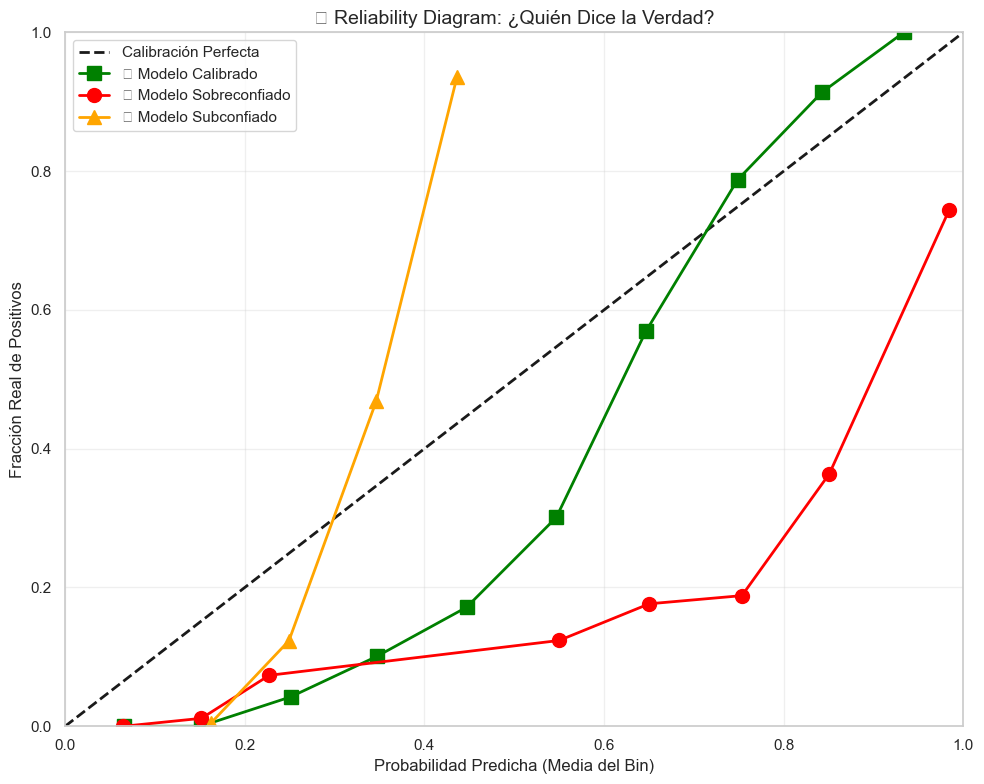

In [3]:
# Calcular curvas de calibración
frac_pos_cal, mean_pred_cal = calibration_curve(
    y_true, y_prob_calibrado, n_bins=10)
frac_pos_over, mean_pred_over = calibration_curve(
    y_true, y_prob_overconf, n_bins=10)
frac_pos_under, mean_pred_under = calibration_curve(
    y_true, y_prob_underconf, n_bins=10)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 8))

# Diagonal perfecta
ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Calibración Perfecta')

# Curvas de cada modelo
ax.plot(mean_pred_cal, frac_pos_cal, 's-', color='green', markersize=10,
        linewidth=2, label='✅ Modelo Calibrado')
ax.plot(mean_pred_over, frac_pos_over, 'o-', color='red', markersize=10,
        linewidth=2, label='🔴 Modelo Sobreconfiado')
ax.plot(mean_pred_under, frac_pos_under, '^-', color='orange', markersize=10,
        linewidth=2, label='🟠 Modelo Subconfiado')

ax.set_xlabel('Probabilidad Predicha (Media del Bin)', fontsize=12)
ax.set_ylabel('Fracción Real de Positivos', fontsize=12)
ax.set_title('📊 Reliability Diagram: ¿Quién Dice la Verdad?', fontsize=14)
ax.legend(loc='upper left', fontsize=11)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 🔍 Interpretación del Reliability Diagram

| Patrón | Significado | Problema |
|--------|-------------|----------|
| **Sobre la diagonal** | El modelo dice menos de lo que pasa | **Subconfiado** - Subestima el riesgo |
| **Bajo la diagonal** | El modelo dice más de lo que pasa | **Sobreconfiado** - Exagera el riesgo |
| **Sobre la diagonal** | Predicción = Realidad | **Calibrado** ✅ |

### Forma típica de cada problema:

```
Sobreconfiado (Sigmoid shape)     Subconfiado (Inverse sigmoid)
        ____                              ____
       /                                      \
      /                                        \
     /                                          \
----/                                            \----
```

## 📏 Brier Score: La Métrica de Calibración

El **Brier Score** mide qué tan lejos están tus probabilidades de la realidad:

$$\text{Brier Score} = \frac{1}{N} \sum_{i=1}^{N} (p_i - y_i)^2$$

Donde:
- $p_i$ = Probabilidad predicha
- $y_i$ = Etiqueta real (0 o 1)

**Interpretación:**
- **0** = Perfecto (todas las predicciones aciertan exactamente)
- **0.25** = Tan malo como predecir siempre 0.5 (máxima ignorancia)
- **Menor es mejor**

In [4]:
# Calcular Brier Score para cada modelo
brier_cal = brier_score_loss(y_true, y_prob_calibrado)
brier_over = brier_score_loss(y_true, y_prob_overconf)
brier_under = brier_score_loss(y_true, y_prob_underconf)
brier_random = brier_score_loss(
    y_true, np.full(n, 0.5))  # Baseline: siempre 0.5

print("📏 BRIER SCORE (menor es mejor)\n")
print(f"✅ Modelo Calibrado:    {brier_cal:.4f}")
print(f"🔴 Modelo Sobreconfiado: {brier_over:.4f}")
print(f"🟠 Modelo Subconfiado:   {brier_under:.4f}")
print(f"⚪ Baseline (siempre 0.5): {brier_random:.4f}")


📏 BRIER SCORE (menor es mejor)

✅ Modelo Calibrado:    0.1442
🔴 Modelo Sobreconfiado: 0.2176
🟠 Modelo Subconfiado:   0.1582
⚪ Baseline (siempre 0.5): 0.2500


C:\Users\Theki\AppData\Local\Temp\ipykernel_34216\2557323695.py:20: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Arial.
  plt.tight_layout()
c:\ProgramData\Anaconda3\envs\ml_pro\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


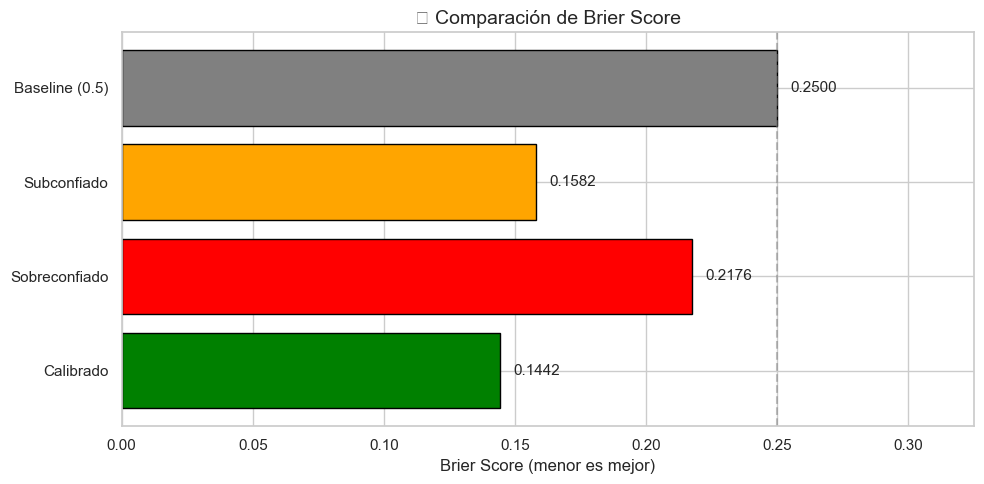

In [5]:
# Visualizar Brier Scores
modelos = ['Calibrado', 'Sobreconfiado', 'Subconfiado', 'Baseline (0.5)']
scores = [brier_cal, brier_over, brier_under, brier_random]
colores = ['green', 'red', 'orange', 'gray']

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(modelos, scores, color=colores, edgecolor='black')

# Añadir valores en las barras
for bar, score in zip(bars, scores):
    ax.text(score + 0.005, bar.get_y() + bar.get_height()/2,
            f'{score:.4f}', va='center', fontsize=11)

ax.set_xlabel('Brier Score (menor es mejor)', fontsize=12)
ax.set_title('📏 Comparación de Brier Score', fontsize=14)
ax.set_xlim([0, max(scores) * 1.3])
ax.axvline(brier_random, color='gray', linestyle='--',
           alpha=0.5, label='Umbral de ignorancia')

plt.tight_layout()
plt.show()


## 🔧 ¿Cómo Arreglar un Modelo Descalibrado?

Scikit-Learn ofrece `CalibratedClassifierCV` con dos métodos:

### 1. **Platt Scaling (Sigmoid)**
- Ajusta una regresión logística sobre las probabilidades.
- Funciona bien cuando la descalibración tiene forma de "S".
- Rápido y simple.

### 2. **Isotonic Regression**
- Ajuste no paramétrico (más flexible).
- Puede corregir cualquier forma de descalibración.
- **Requiere más datos** para no sobreajustar.

```python
from sklearn.calibration import CalibratedClassifierCV

# Opción 1: Sigmoid (Platt Scaling)
calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv=5)

# Opción 2: Isotonic Regression
calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=5)
```

## 🧪 Demo: Calibrando un Modelo Descalibrado

Vamos a "arreglar" el modelo sobreconfiado usando Isotonic Regression (simulado).

In [6]:
from sklearn.isotonic import IsotonicRegression

# Simular calibración con Isotonic Regression
# En la práctica usarías CalibratedClassifierCV, pero aquí lo hacemos manual para visualizar

# Dividir en "calibración" y "test"
n_cal = 700
y_true_cal, y_true_test = y_true[:n_cal], y_true[n_cal:]
y_prob_over_cal, y_prob_over_test = y_prob_overconf[:n_cal], y_prob_overconf[n_cal:]

# Ajustar Isotonic Regression
iso_reg = IsotonicRegression(out_of_bounds='clip')
iso_reg.fit(y_prob_over_cal, y_true_cal)

# Transformar las probabilidades del test
y_prob_fixed = iso_reg.predict(y_prob_over_test)

print(
    f"Probabilidades originales: [{y_prob_over_test.min():.2f}, {y_prob_over_test.max():.2f}]")
print(
    f"Probabilidades corregidas: [{y_prob_fixed.min():.2f}, {y_prob_fixed.max():.2f}]")


Probabilidades originales: [0.04, 1.00]
Probabilidades corregidas: [0.00, 0.81]


C:\Users\Theki\AppData\Local\Temp\ipykernel_34216\920091473.py:32: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Theki\AppData\Local\Temp\ipykernel_34216\920091473.py:32: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Theki\AppData\Local\Temp\ipykernel_34216\920091473.py:32: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) Arial.
  plt.tight_layout()
c:\ProgramData\Anaconda3\envs\ml_pro\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\envs\ml_pro\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\envs\ml_pro\lib\site-packages\IPython\core\pylabtools.py:170: UserWarn

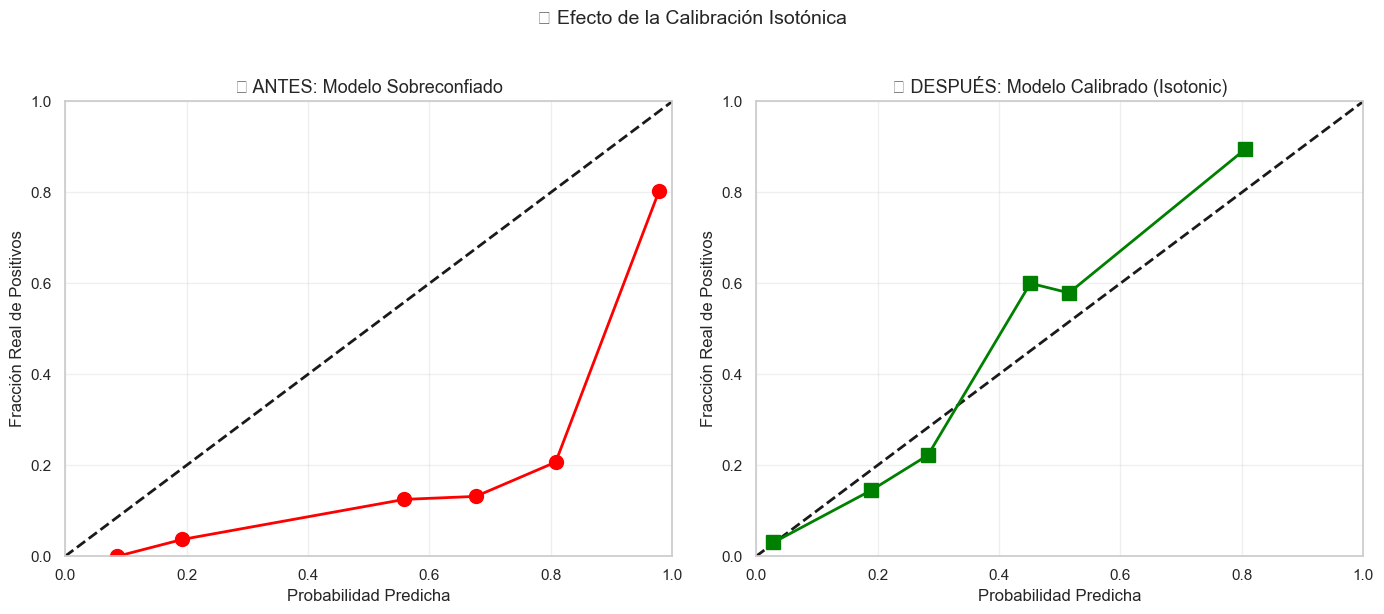


📏 Brier Score ANTES:   0.1996
📏 Brier Score DESPUÉS: 0.0902


In [7]:
# Comparar antes vs después
frac_antes, mean_antes = calibration_curve(
    y_true_test, y_prob_over_test, n_bins=8)
frac_despues, mean_despues = calibration_curve(
    y_true_test, y_prob_fixed, n_bins=8)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Antes
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Perfecta')
axes[0].plot(mean_antes, frac_antes, 'o-',
             color='red', markersize=10, linewidth=2)
axes[0].set_title('🔴 ANTES: Modelo Sobreconfiado', fontsize=13)
axes[0].set_xlabel('Probabilidad Predicha')
axes[0].set_ylabel('Fracción Real de Positivos')
axes[0].set_xlim([0, 1])
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3)

# Después
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Perfecta')
axes[1].plot(mean_despues, frac_despues, 's-',
             color='green', markersize=10, linewidth=2)
axes[1].set_title('✅ DESPUÉS: Modelo Calibrado (Isotonic)', fontsize=13)
axes[1].set_xlabel('Probabilidad Predicha')
axes[1].set_ylabel('Fracción Real de Positivos')
axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])
axes[1].grid(True, alpha=0.3)

plt.suptitle('🔧 Efecto de la Calibración Isotónica', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Brier Scores
print(
    f"\n📏 Brier Score ANTES:   {brier_score_loss(y_true_test, y_prob_over_test):.4f}")
print(
    f"📏 Brier Score DESPUÉS: {brier_score_loss(y_true_test, y_prob_fixed):.4f}")


## ⚠️ Advertencias Importantes

### 1. La calibración NO mejora el AUC
El AUC mide el **ranking** (quién está arriba de quién). La calibración ajusta las **magnitudes**, no el orden.

### 2. Necesitas datos de validación
No puedes calibrar con los mismos datos de entrenamiento. Necesitas un conjunto separado (o usar CV).

### 3. Algunos modelos ya están bien calibrados
- **Regresión Logística:** Generalmente bien calibrada por diseño.
- **Naive Bayes:** Típicamente muy descalibrado (probabilidades extremas).
- **Random Forest / GBM:** Depende, pero suelen necesitar calibración.

### 4. Isotonic vs Sigmoid
| Método | Cuándo Usar |
|--------|-------------|
| **Sigmoid** | Datasets pequeños (<1000), descalibración suave |
| **Isotonic** | Datasets grandes (>5000), descalibración compleja |

## 🏁 Conclusiones

### Lo que aprendimos:

1. **Un modelo con alto AUC puede mentir** en sus probabilidades.

2. **El Reliability Diagram** es el gráfico clave para detectar descalibración:
   - Sobre la diagonal → Subconfiado
   - Bajo la diagonal → Sobreconfiado

3. **El Brier Score** cuantifica qué tan calibrado está el modelo (menor = mejor).

4. **CalibratedClassifierCV** puede arreglar modelos descalibrados:
   - `method='sigmoid'` para casos simples
   - `method='isotonic'` para casos complejos

5. **La calibración es CRÍTICA** cuando:
   - Usas probabilidades para decisiones de negocio
   - Calculas Profit Curves o ROI
   - Trabajas en banca, seguros o salud

---

### 🔗 Conexión con Profit Curves

```
┌────────────────────────────────────────────────────────────────┐
│                                                                │
│   MODELO  ──►  CALIBRACIÓN  ──►  PROFIT CURVE  ──►  DECISIÓN   │
│                                                                │
│   Si saltas la calibración, tus Profit Curves son MENTIRA      │
│                                                                │
└────────────────────────────────────────────────────────────────┘
```

**¡Ahora puedes confiar en las probabilidades de tu modelo!** 🚀